In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
check=pd.read_csv("Fraud_check.csv")
check.head(7)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES


In [ ]:
check= check.rename({'Marital.Status':'M_status','Taxable.Income':'T_income','City.Population':'C_population','Work.Experience':'W_exp'},axis=1) #Rename 
check.head(4)

,Undergrad,M_status,T_income,C_population,W_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES


In [ ]:
# Checking for null values
check.isna().sum()

Undergrad       0
M_status        0
T_income        0
C_population    0
W_exp           0
Urban           0
dtype: int64

In [ ]:
# Checking the information about Data Frame
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Undergrad     600 non-null    object
 1   M_status      600 non-null    object
 2   T_income      600 non-null    int64 
 3   C_population  600 non-null    int64 
 4   W_exp         600 non-null    int64 
 5   Urban         600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
# Dropping the column
fraud = check.drop(['C_population'], axis = 1)
fraud.head(4)

,Undergrad,M_status,T_income,W_exp,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES


In [ ]:
# Grouping the Data by categorical column
fraud.groupby(['Undergrad', 'M_status' ,'Urban']).count()

T_income  W_exp
Undergrad M_status Urban                 
NO        Divorced NO           53     53
                   YES          44     44
          Married  NO           44     44
                   YES          47     47
          Single   NO           46     46
                   YES          54     54
YES       Divorced NO           50     50
                   YES          42     42
          Married  NO           50     50
                   YES          53     53
          Single   NO           55     55
                   YES          62     62

In [ ]:
#Condition which is taxable_income<=30000
s1=np.empty(600, dtype=object)   #empty numpy array s1 with 600 elements of object data type
k=0

for value in fraud['T_income']:   
    if value<=30000:
        s1[k]='Risky'
    else:
        s1[k]='Good'
    k=k+1 

In [ ]:
x1=pd.DataFrame(s1,columns=['Tax_Value']) #Create a new column based on taxable_income<=30000 condition
x1.head(7)

,Tax_Value
0,Good
1,Good
2,Good
3,Good
4,Good
5,Good
6,Good


In [ ]:
fraud_1 = pd.concat([fraud,x1],axis=1)
fraud_1.head()

,Undergrad,M_status,T_income,W_exp,Urban,Tax_Value
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


In [ ]:
fraud_1.Tax_Value.value_counts()

Good     476
Risky    124
Name: Tax_Value, dtype: int64

###**Visualization**

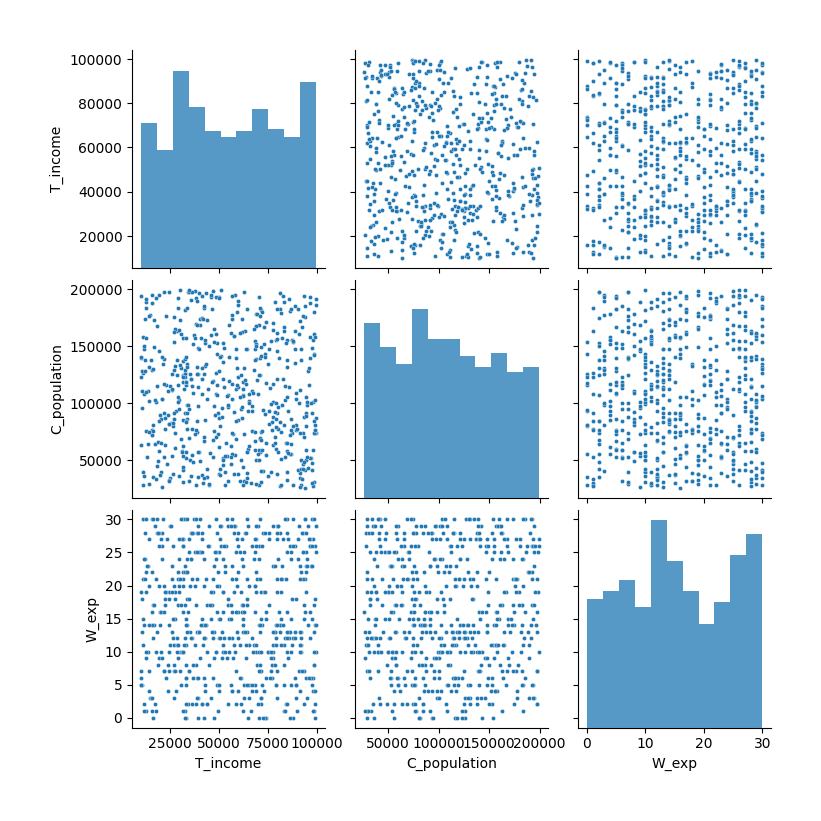

In [ ]:
# Create the default pairplot
sns.pairplot(check)

<Axes: xlabel='M_status'>

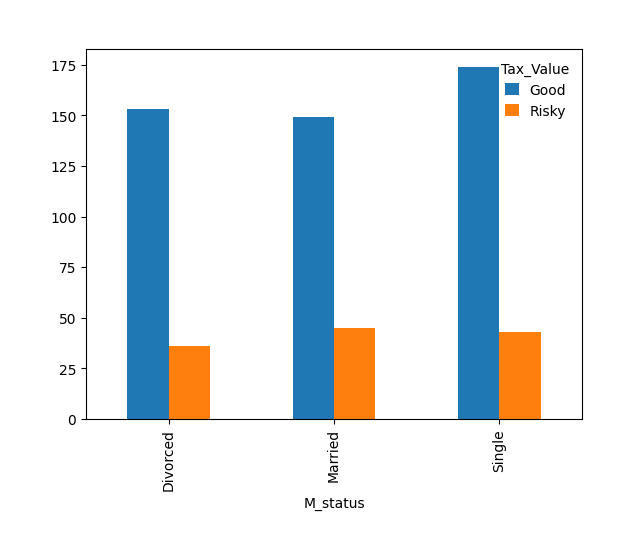

In [ ]:
pd.crosstab(fraud_1.M_status,fraud_1.Tax_Value).plot(kind = 'bar') 

<Axes: xlabel='Tax_Value', ylabel='count'>

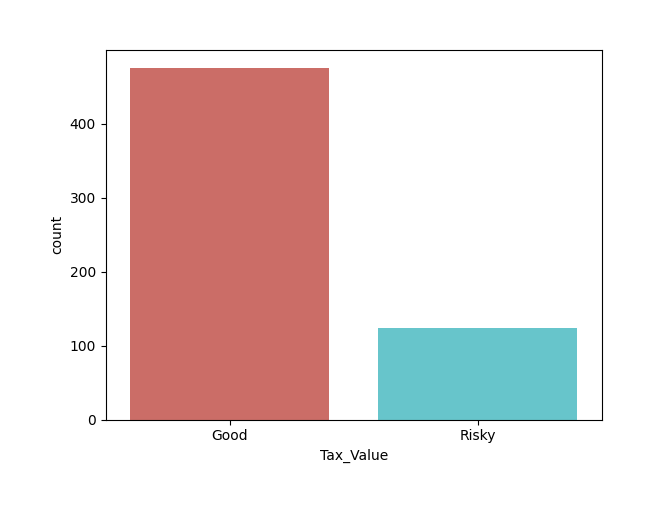

In [ ]:
sb.countplot(x="Tax_Value",data=fraud_1,palette="hls")

In [ ]:
#Label Encoding
label_encoder = preprocessing.LabelEncoder()
fraud_1['Undergrad']= label_encoder.fit_transform(fraud_1['Undergrad'])
fraud_1['M_status']= label_encoder.fit_transform(fraud_1['M_status'])
fraud_1['Urban']= label_encoder.fit_transform(fraud_1['Urban'])
fraud_1['Tax_Value']= label_encoder.fit_transform(fraud_1['Tax_Value'])

In [ ]:
fraud_1.head()

,Undergrad,M_status,T_income,W_exp,Urban,Tax_Value
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [ ]:
fraud_1.corr()

,Undergrad,M_status,T_income,W_exp,Urban,Tax_Value
Undergrad,1.000000,0.042407,-0.049232,-0.005362,-0.000267,0.012523
M_status,0.042407,1.000000,-0.012944,-0.002213,0.064562,0.006081
T_income,-0.049232,-0.012944,1.000000,-0.001818,0.070628,-0.688725
W_exp,-0.005362,-0.002213,-0.001818,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,0.070628,-0.094559,1.000000,0.004830
Tax_Value,0.012523,0.006081,-0.688725,-0.001972,0.004830,1.000000


In [ ]:
X=fraud_1.drop(['Tax_Value'], axis=1)
Y=fraud_1[['Tax_Value']]

In [ ]:
X.head(7)

,Undergrad,M_status,T_income,W_exp,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
5,0,0,33329,0,0
6,0,0,83357,8,1


In [ ]:
Y.tail(7)

,Tax_Value
593,0
594,0
595,0
596,0
597,0
598,0
599,0


###**Random Forest Classifier**

In [ ]:
num_trees = 80
max_features = 6

In [ ]:
kfold = KFold(n_splits=9, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [ ]:
results = cross_val_score(model, X, Y, cv=kfold)
print("The accuracy is",results.mean())

The accuracy is 0.9983164983164983


###**Stacking Ensemble for Classification**

In [ ]:
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print("The accuracy is",results.mean())

The accuracy is 0.9916666666666666


###**AdaBoost Classification**

In [ ]:
kfold = KFold(n_splits=7, random_state=42, shuffle = True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print("The accuracy is",results.mean())

The accuracy is 0.9983193277310924
